# Witcher's Saga Network - NLTK processing

All code is placed in 'witcher.py'. There are only snippets.

In [1]:
import witcher as w

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tomek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


analiza podstawowa...
analiza kontekstowa...


## Data

I based on 5 books (saved as .txt files) that build Witcher's saga (prequels/sequels not included)

In [2]:
filenames = [
    'Blood of Elves.txt', 'Times of Contempt.txt',
    'Baptism of Fire.txt', 'The Tower of the Swallow.txt', 'The Lady of the Lake.txt'
]

I took characters and their aliases from Witcher fandom wiki and supported it by LLM (chatgpt) to find the biggest amount of possible names. There's always possibility of hallucination, but if alias is imagined by AI and doesn't exist in txt file, then there just won't be a node connection. Only threat is a situation where LLM miss someone with another person's alias. I checked it and didn't see any of two situations happen.


In [3]:
base_characters_map = {
    "Geralt": [
        "geralt of rivia", "geralt", "white wolf", "gwynbleidd",
        "butcher of blaviken", "ravix of fourhorn"
    ],
    "Yennefer": [
        "yennefer", "yen", "yenna", "horsewoman of war", "yennefer of vengerberg"
    ],
    "Ciri": [
        "ciri", "cirilla", "lion cub of cintra", "falka", "zireael",
        "swallow", "lady of space and time", "lady of the lake",
        "cirilla fiona elen riannon"
    ],
    "Triss": [
        "triss", "merigold", "triss merigold", "fourteenth of the hill", "fearless"
    ],
    "Dandelion": [
        "dandelion", "dandilion", "julian alfred pankratz",
        "viscount de lettenhove", "sandpiper"
    ],
    "Milva": ["milva", "maria barring", "kite", "sorrel"],
    "Regis": ["regis", "emiel regis", "emiel regis rohellec terzieff-godefroy"],
    "Cahir": ["cahir", "cahir mawr dyffryn aep ceallach", "black knight", "nightmare of cintra"],
    "Angouleme": ["angouleme", "angoulême"],
    "Vesemir": ["vesemir"],
    "Lambert": ["lambert"],
    "Eskel": ["eskel"],
    "Coen": ["coen"],
    "Philippa Eilhart": ["philippa", "philippa eilhart", "she-wolf of the court"],
    "Francesca Findabair": ["francesca", "francesca findabair", "enid an gleanna", "daisy of the valleys"],
    "Fringilla Vigo": ["fringilla", "fringilla vigo"],
    "Keira Metz": ["keira", "keira metz"],
    "Margarita Laux-Antille": ["margarita", "margarita laux-antille", "rita"],
    "Sheala de Tancarville": ["sheala", "sile", "sheala de tancarville", "sile de tancarville"],
    "Sabrina Glevissig": ["sabrina", "sabrina glevissig", "daughter of the kaedwenian wilderness"],
    "Assire var Anahid": ["assire", "assire var anahid"],
    "Ida Emean aep Sivney": ["ida", "ida emean", "aen saevherne"],
    "Tissaia de Vries": ["tissaia", "tissaia de vries", "the archmistress"],
    "Lydia van Bredevoort": ["lydia", "lydia van bredevoort"],
    "Marti Sodergren": ["marti", "marti sodergren"],
    "Vilgefortz": ["vilgefortz", "vilgefortz of roggeveen"],
    "Emhyr": [
        "emhyr", "emhyr var emreis", "duny", "white flame",
        "white flame dancing on the barrows of his enemies",
        "urcheon of erlenwald", "deithwen addan yn carn aep morvudd"
    ],
    "Bonhart": ["bonhart", "leo bonhart"],
    "Stefan Skellen": ["skellen", "stefan skellen", "tawny owl", "coroner"],
    "Rience": ["rience"],
    "Schirru": ["schirru"],
    "Vattier de Rideaux": ["vattier", "vattier de rideaux", "chief of military intelligence"],
    "Mistle": ["mistle"],
    "Kayleigh": ["kayleigh"],
    "Giselher": ["giselher"],
    "Iskra": ["iskra"],
    "Reef": ["reef"],
    "Asse": ["asse"],
    "Foltest": ["foltest", "king foltest", "lord of temeria"],
    "Meve": ["meve", "queen meve", "the white queen"],
    "Henselt": ["henselt", "king henselt", "boar"],
    "Demavend": ["demavend", "demavend iii"],
    "Calanthe": ["calanthe", "lioness of cintra", "queen calanthe", "ard rhena"],
    "Pavetta": ["pavetta"],
    "Esterad Thyssen": ["esterad", "esterad thyssen", "king of kovir"],
    "Anna Henrietta": ["anna henrietta", "anarietta"],
    "Zoltan Chivay": ["zoltan", "zoltan chivay"],
    "Yarpen Zigrin": ["yarpen", "yarpen zigrin"],
    "Sigismund Dijkstra": ["dijkstra", "sigismund dijkstra", "count dijkstra", "sigi"],
    "Nenneke": ["nenneke", "mother nenneke"],
    "Shani": ["shani"],
    "Iola": ["iola"],
    "Jarre": ["jarre"],
    "Dudu": ["dudu", "tellico lunngrevink letorte", "biberveldt"],
    "Codringher": ["codringher"],
    "Fenn": ["fenn", "jacob fenn"],
    "Essi Daven": ["essi", "essi daven", "little eye"],
    "Borch Three Jackdaws": ["borch", "borch three jackdaws", "villentretenmerth", "gold dragon"],
    "Renfri": ["renfri", "shrike"],
    "Istredd": ["istredd"],
    "Stregobor": ["stregobor"],
    "Crach an Craite": ["crach", "crach an craite", "wild boar of the sea", "tirth ys muire"],
    "Mousesack": ["mousesack"],
    "Lara Dorren": ["lara", "lara dorren", "lara dorren aep shiadhal"],
    "Avallac'h": ["avallac'h", "crevan espane aep caomhan macha", "fox"],
    "Eredin": ["eredin", "eredin breacc glas", "king of the wild hunt", "sparrowhawk"],
    "Auberon Muircetach": ["auberon", "king of the alders", "auberon muircetach"],
    "Ihuarraquax": ["ihuarraquax", "little horse"],
    "Toruviel": ["toruviel"],
    "Yaevinn": ["yaevinn"],
    "Isengrim Faoiltiarna": ["isengrim", "isengrim faoiltiarna", "iron wolf"],
    "Filavandrel": ["filavandrel", "filavandrel aen fidhaill"]
}

## Centrality

The function below returns list of top 10 central characters calculated by degree centrality method.

You can see that 'Ciri' has the highest centrality with more than 0.82, which makes her main character of the series. Then we have 'Geralt' with 0.62 as he's a titular character. High centrality (0.41-0.49) stays for characters connected with 'Butcher of Blaviken' like Triss (close friend), Yennefer (lover), Dandelion (best friend) and Vilgefortz (nemesis).

In [4]:
w.centrality()


--- Top 10 Centralność (Model Context) ---
Ciri: 0.825
Geralt: 0.619
Triss: 0.492
Dandelion: 0.460
Yennefer: 0.413
Vilgefortz: 0.413
Philippa Eilhart: 0.413
Emhyr: 0.397
Francesca Findabair: 0.317
Rience: 0.302


## Graphs

First chart is basic interaction net. We just count number of appearances of aliases (for each person) from characters_map. Number of appearances equals node size. Same with edges, if in tokenized fragment of text there are 2 (or more) characters existing then we have a connection (edge). Few more connections of the same people increase weight of the edge.

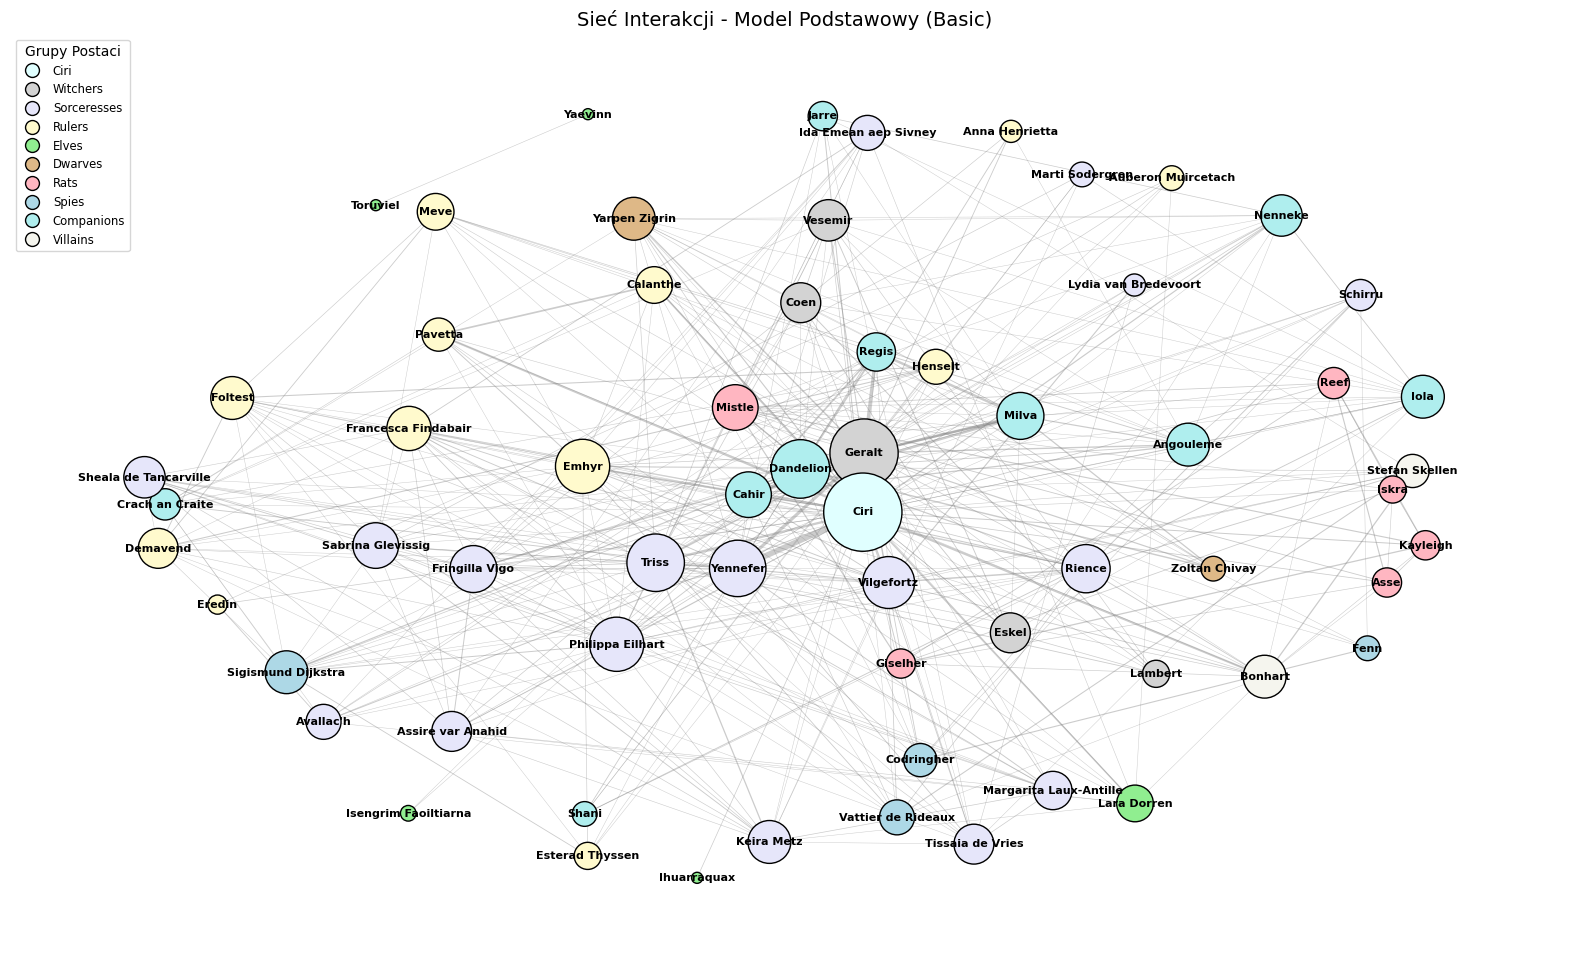

In [5]:
w.chart0()

Next one does the same, but I also added denoising algorithm that finds most probable character for general aliases like 'witcher', 'sorceress', 'king', etc. Algorithm is similar to k-NN, we take n (for example 5) previous tokenized sentences, actual token we currently check and n for next sentences too. So we have 2n + 1. Within that we calculate how many character appearances matching general alias we have and assign it for person with most (if there is a draw between characters we choose randomly).

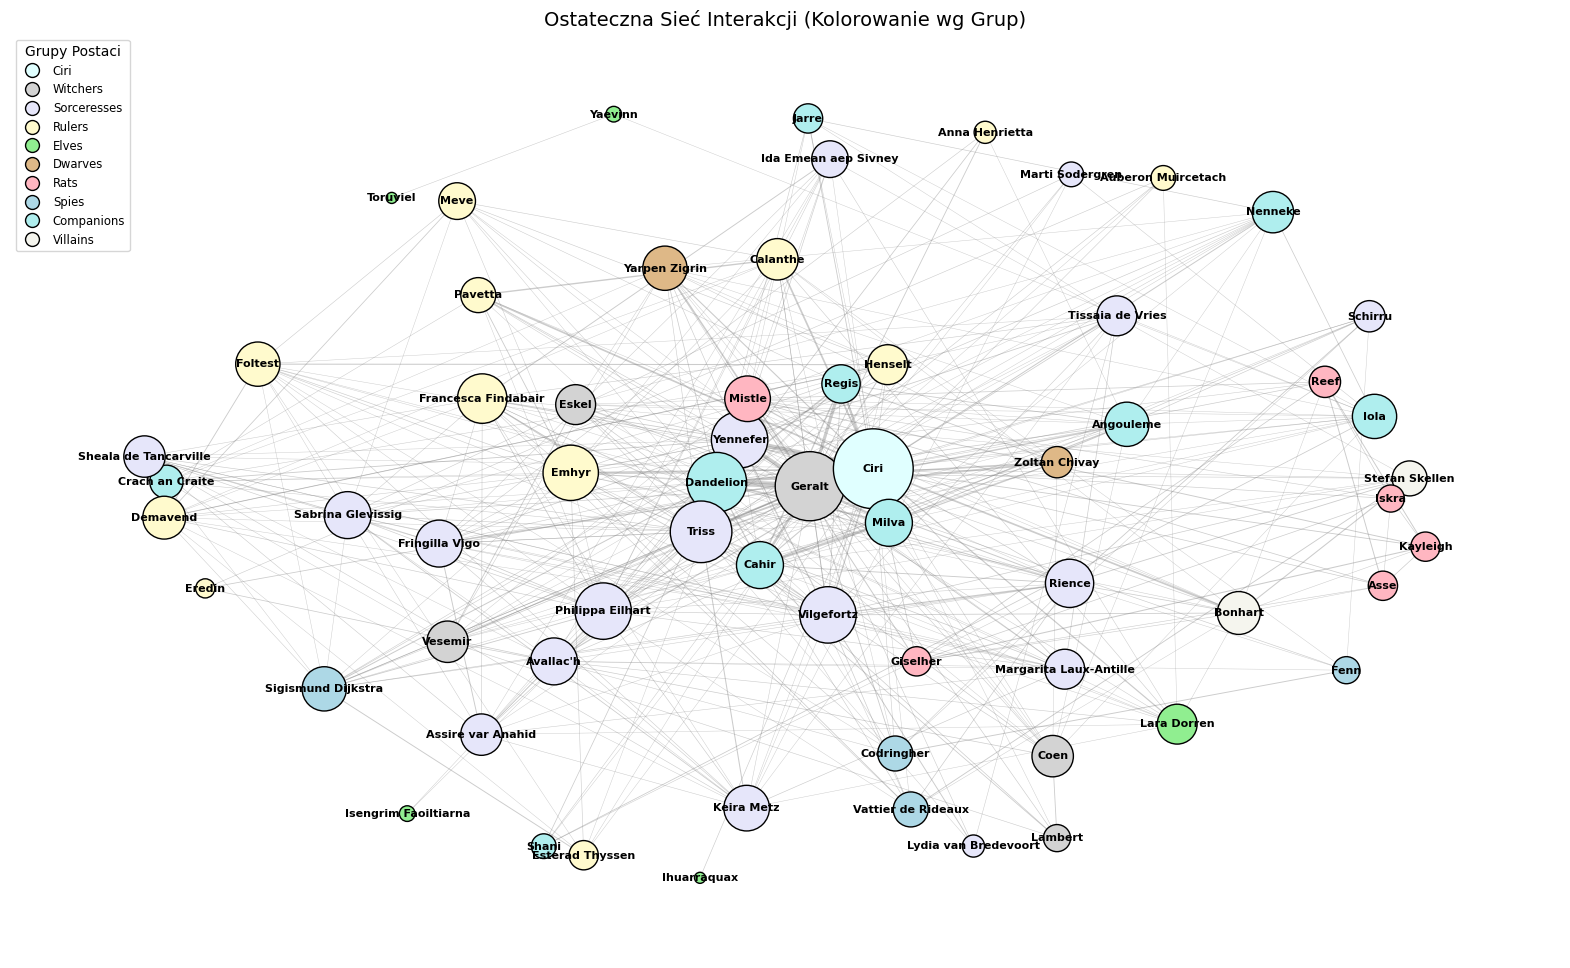

In [6]:
w.chart1()

## Changes

Top 10 beneficiary in case of new connections (with new character).

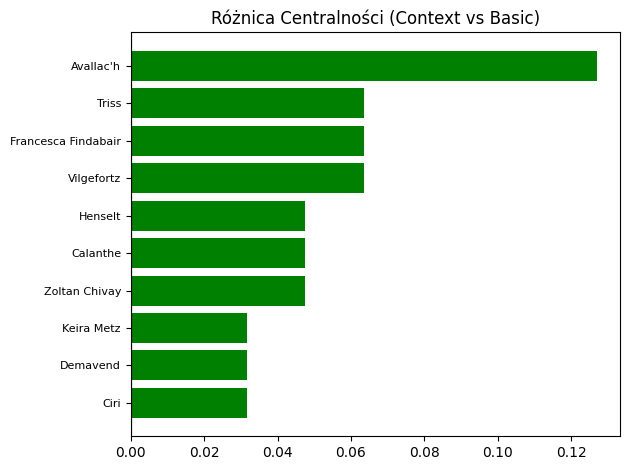

In [7]:
w.chart2()

All beneficiary that got more than 1 new connection.

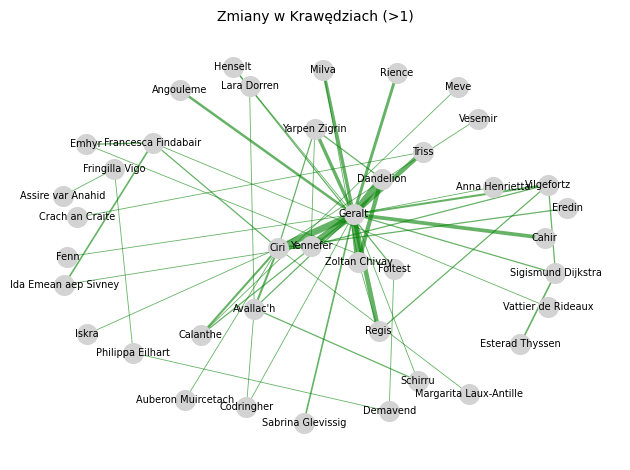

In [8]:
w.chart3()